<a href="https://colab.research.google.com/github/BasiraS/data_analytics_2/blob/main/Python/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Unit4_L2_ML_Boston_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Basira Shirzad

# Date: 01-18-2021

# Machine Learning - Linear Regression on Boston Housing Dataset

## Data Background and Problem Statement


https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features. Open-source ML library for Python. Built on NumPy, SciPy, and Matplotlib. ... Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms.

# Task 1 : Environment Set up

## Import Libraries

In [1]:
# Import required libraries 
import numpy as np
import pandas as pd

# Task 2 : Data Collection

In [2]:
# Import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
# Create a pandas dataframe and store the data
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names

In [4]:
# Check the head of the dataframe to get a clear idea of all the columns in the dataframe
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# List of Columns in the dataframe
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [6]:
# Append target as Price, new columnn to the dataset
df_boston['Price'] = boston_dataset.target

In [7]:
# Check the head of the dataframe to see if column was added
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Check for missing data

In [8]:
# Check for missing data in the data frame
# Use sum to count the NaN values for each column
df_boston.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [9]:
# Import required libraries 
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


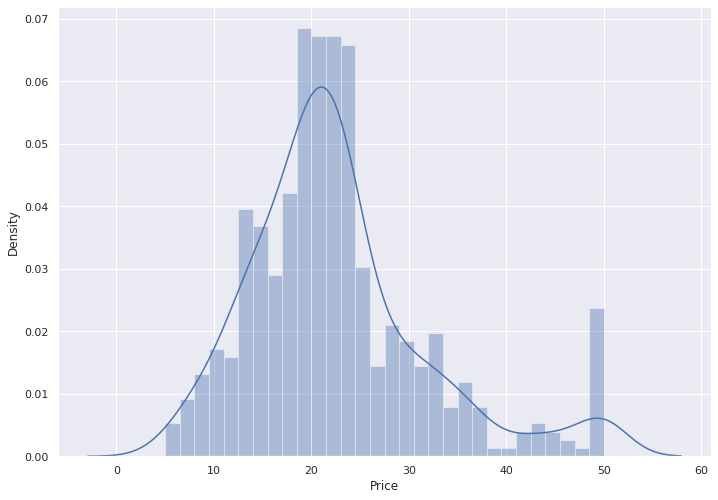

In [10]:
# View the distribution plot on Boston prices

# rc parameter sets the aesthetics for the plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Set figure size by passing dictionary to rc parameter with key 'figure.figsize' in seaborn set method
sns.distplot(df_boston['Price'], bins=30)
plt.show()

* The distribution plot for price is rightly/positive skewed. 

 # Correlation Matrix

Create a correlation matrix that measures the linear relationships between the variables. A correlation matrix is a table showing correlation coefficients between variables.

A perfect negative correlation is represented by the value -1.0, while a 0 indicates no correlation, and +1 indicates a perfect positive correlation. A perfect negative correlation means the relationship that exists between two variables is exactly opposite all of the time.

To print the values inside the square, do annot = True.

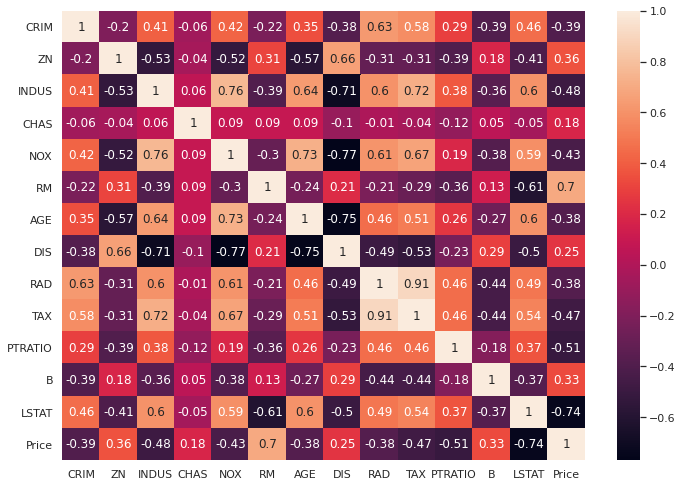

In [11]:
# Create the correlation matrix with the Boston dataframe
correlation_matrix = df_boston.corr().round(2)

# View the correlation matrix of the Boston dataframe
sns.heatmap(data=correlation_matrix , annot=True)

# Write Your Observations

* The INDUS col and NOX col has a positive correlation.
* The INDUS col and DIS col has a negative correlation.
* The INDUS col and TAX col has a positive correlation.

* The CHAS col has mostly no correlation with any of the other columns.

* The NOX col and AGE col has a positive correlation 
* The NOX col and DIS col has a negative correlation 

* The RM col and Price col has a positive correlation 

* The AGE col and DIS col has a negative correlation 

* The RAD col and TAX col has a **strong** positive correlation 

* The LSTAT col and Price col has a negative correlation

# Preparing the data for training the Machine Learning Model

In [12]:
# Assign features on X axis 
X_features = boston_dataset.data

In [13]:
# Assign target on Y axis 
Y_target = boston_dataset.target

# Build Linear Regression Model

In [14]:
# Import linear model - the estimator
from sklearn.linear_model import LinearRegression

In [15]:
# Build the Linear Regression Model
lineReg = LinearRegression()

In [16]:
# Fit data into the the estimator
lineReg.fit(X_features,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The intercept is the expected mean value of y.

In [17]:
# Print the intercept 
print('The estimated intercept: %.2f '%lineReg.intercept_)

The estimated intercept: 36.46 


Regression coefficients represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant.

In [18]:
# Print the coefficient 
print('The coefficient is %d ' %len(lineReg.coef_))

The coefficient is 13 


# Model Training

Train model split the whole dataset into train and test datasets.

In [19]:
# Import from the sklearn library the train_test_split
from sklearn.model_selection import train_test_split

In [20]:
# Split the train data frame so you have a portion of data to train the model and then later test the model
# 25% of the data will be tested and 75% of the data will be trained
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target)

In [21]:
# Print the dataset shape
print(boston_dataset.data.shape)

(506, 13)


In [22]:
# Print shapes of the training and testing data sets
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [23]:
# Fit the training sets into the model
lineReg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Caluclate RMSE and R Square:

# RMSE
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

# R Square

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination,the higher r means ,the higher percentage of points the line passes through when the data points and line are plotted. If the coefficient is 0.80, then 80% of the points should fall within the regression line.The usefulness of R2 is its ability to find the likelihood of future events falling within the predicted outcomes. 


https://drive.google.com/file/d/1YPzOS2dbKIuVOuYWhCeP9HOs0WcWxGaK/view?usp=sharing


In [24]:
# Import from the sklearn metric library the mean_squared_error and r2_score
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Model evaluation for training set
y_train_predict = lineReg.predict(X_train)

# Root mean square error of the model
rmse = np.sqrt(mean_squared_error(Y_train,y_train_predict))

# R-squared score of the model
r2 = r2_score(Y_train, y_train_predict)

# Print results
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.642298849934564
R2 score is 0.7308701343161133




In [26]:
# Model evaluation for testing set
y_test_predict = lineReg.predict(X_test)

# Root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# R-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

# Print results
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.910895567899158
R2 score is 0.7521606072271612


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


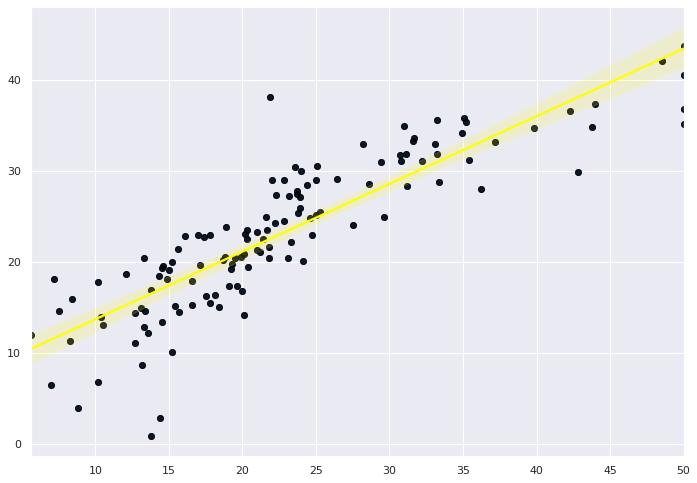

In [27]:
# View the linear regression model on the data set
import pandas as pd
import seaborn as sns
# plotting the y_test vs y_pred
# ideally should have been a straight line

scatter = plt.scatter(Y_test, y_test_predict)
regplot = sns.regplot(Y_test, y_test_predict, x="Y_test", y="y_test_predict", data=scatter,
                 scatter_kws={"color": "black"}, line_kws={"color": "yellow"})

# Conclusion 

Overall, this linear regression model has an R-squared of .75, which is a good relationship between the model and the response variable. It is not strong or poor, but good enough to fit and explain the variation of the output with different inputs. The RMSE value for this linear regression model is 4.91, which is good as well. There are a few areas where the data points are far from the regression line. These values do not provide a formal hypothesis test for this relationship, so an F-test of overall significance would be needed to determine whether this relationship is statistically significant.